#Data Extraction -> sentence  segmentation -> word tokenization -> Preprocessing (text cleaning i.e stemming,stop words removal ,lemizatation)

In [5]:
!pip install nltk

In [6]:
!pip install spacy

In [21]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')
doc = nlp("I am danjo who loves etc. to code . I am very proficient in coding ")
for sentence in doc.sents:
  for word in sentence:
    print(word)

I
am
danjo
who
loves
etc
.
to
code
.
I
am
very
proficient
in
coding


In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

sent_tokenize("I am danjo who loves etc. to code . I am very proficient in coding ")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I am danjo who loves etc.', 'to code .', 'I am very proficient in coding']

In [4]:
for token in doc:
  print(token)

I
am
danjo
who
loves
etc
.
to
code
.
I
am
very
proficient
in
coding


In [5]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [6]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7d813cb07820>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7d813cbc1300>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7d81415e2ab0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7d813c894440>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7d813c8c6080>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7d81415aec70>)]

In [2]:
# Using stemmer in spacy
import spacy
nlp_stem = spacy.load('en_core_web_sm')
doc_stem = nlp_stem("eat eating ate adjustable ")

for token in doc_stem:
  print(token.lemma_)


eat
eat
eat
adjustable


#### Genism

In [1]:
!pip install gensim

In [7]:
import gensim.downloader as api
wv = api.load("word2vec-google-news-300")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd

In [10]:
data = pd.read_csv("/content/fake_and_real_news.csv")

In [11]:
data.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [12]:
data.shape

(9900, 2)

In [13]:
data.label.value_counts()
#data['label'].value_counts()

,count
label,
Fake,5000
Real,4900


In [14]:

from sklearn.preprocessing import LabelEncoder

df = data.copy()
labelenc = LabelEncoder()
df['num_label'] = labelenc.fit_transform(df['label'])
df.head()


,Text,label,num_label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [19]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [16]:
df.head()

,Text,label,num_label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [20]:

def pre_processing_and_vectorize_text(text):

  filtered = []
  doc = nlp(text)
  for token in doc:
    if token.is_punct or token.is_stop:
      continue
    filtered.append(token.lemma_)
  return wv.get_mean_vector(filtered)

In [22]:
pre_processing_and_vectorize_text("Don't worry if you don't understand").shape

(300,)

In [23]:
df['vactor'] = df['Text'].apply(lambda text:pre_processing_and_vectorize_text(text))

In [24]:
df

,Text,label,num_label,vactor
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.008657642, 0.019024342, -0.011917442, 0.032..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.010864096, 0.007960429, 0.0011915653, 0.014..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.018134918, 0.0062743523, -0.005872244, 0.03..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.01255197, 0.012613623, 5.9780963e-05, 0.021..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.0019059887, 0.011889367, 0.0035395357, 0.0..."
...,...,...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake,0,"[0.009046372, 0.015129782, -0.00394294, 0.0316..."
9896,Trump consults Republican senators on Fed chie...,Real,1,"[0.010050427, 0.0036850946, -0.0031512326, 0.0..."
9897,Trump lawyers say judge lacks jurisdiction for...,Real,1,"[0.0032499663, 0.004776459, 0.010537294, -0.00..."
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake,0,"[0.0055283327, 0.014677874, 0.00027507733, 0.0..."


In [25]:
df['vactor'].shape

(9900,)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(df.vactor.values,df.num_label,test_size=0.2,random_state=42,stratify=df.num_label)

In [27]:
print(X_train.shape)
print(X_test.shape)


(7920,)
(1980,)


In [28]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [29]:
X_train_2d.shape

(7920, 300)

In [30]:
X_test_2d.shape

(1980, 300)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()
clf.fit(X_train_2d,y_train)
y_pred=clf.predict(X_test_2d)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1000
           1       0.97      0.98      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [32]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_news_vectors = [pre_processing_and_vectorize_text(n) for n in test_news]
clf.predict(test_news_vectors)

array([1, 0, 0])

Text(95.72222222222221, 0.5, 'Truth')

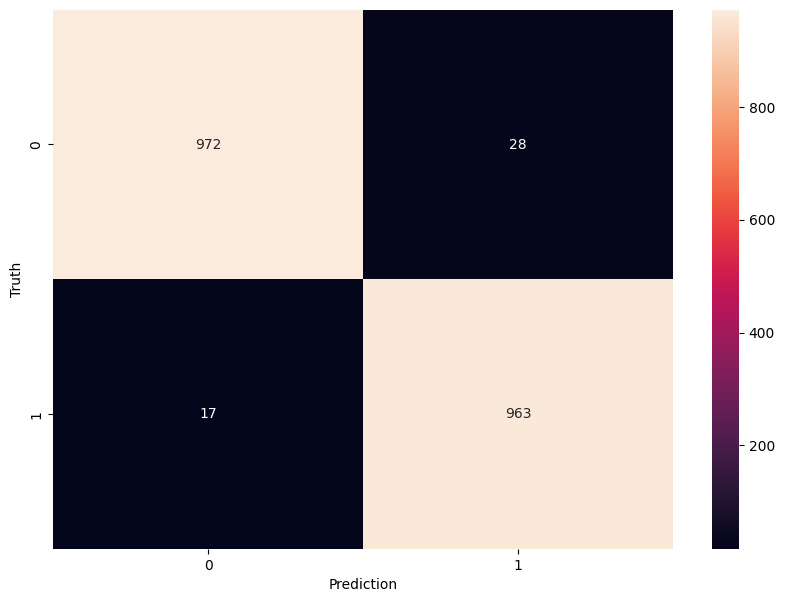

In [33]:
#finally print the confusion matrix for the best model (GradientBoostingClassifier)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
